In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/Churn Modeling.csv')


In [ ]:
df.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.shape

(10000, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [ ]:
df.isnull()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.duplicated().sum()


0

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
# Step 1: Preprocessing
# Encoding categorical variables (Geography, Gender)
df['Geography'] = LabelEncoder().fit_transform(df['Geography'])
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])

# Defining features (X) and target (y)
X = df.drop(columns=['RowNumber', 'CustomerId', 'Surname', 'Exited'])
y = df['Exited']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Step 2: Building the BPNN model
model = Sequential()

# Input layer (number of features) and 2 hidden layers
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))

# Output layer (1 neuron for binary classification)
model.add(Dense(1, activation='sigmoid'))

# Compile the model with binary cross-entropy loss and Adam optimizer
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Step 3: Training the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Step 4: Evaluating the model on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

Epoch 1/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8044 - loss: 0.4939 - val_accuracy: 0.8256 - val_loss: 0.4149
Epoch 2/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8262 - loss: 0.4181 - val_accuracy: 0.8469 - val_loss: 0.3812
Epoch 3/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8523 - loss: 0.3737 - val_accuracy: 0.8481 - val_loss: 0.3615
Epoch 4/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8615 - loss: 0.3397 - val_accuracy: 0.8512 - val_loss: 0.3560
Epoch 5/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8642 - loss: 0.3324 - val_accuracy: 0.8544 - val_loss: 0.3499
Epoch 6/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8569 - loss: 0.3344 - val_accuracy: 0.8550 - val_loss: 0.3493
Epoch 7/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8640 - loss: 0.3338 - val_accuracy: 0.8544 - val_loss: 0.3512
Epoch 8/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8704 - loss: 0.3265 - val_accuracy: 0.

In [ ]:

# ReLU activation function
model_relu = Sequential()
model_relu.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model_relu.add(Dense(32, activation='relu'))
model_relu.add(Dense(16, activation='relu'))
model_relu.add(Dense(1, activation='sigmoid'))

# Compile and train the model
model_relu.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_relu = model_relu.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=0)

# Evaluate the model
test_loss_relu, test_accuracy_relu = model_relu.evaluate(X_test, y_test, verbose=0)
print(f"ReLU - Test Loss: {test_loss_relu:.4f}, Test Accuracy: {test_accuracy_relu:.4f}")


ReLU - Test Loss: 0.3438, Test Accuracy: 0.8570


In [ ]:
# Sigmoid activation function
model_sigmoid = Sequential()
model_sigmoid.add(Dense(64, activation='sigmoid', input_shape=(X_train.shape[1],)))
model_sigmoid.add(Dense(32, activation='sigmoid'))
model_sigmoid.add(Dense(16, activation='sigmoid'))
model_sigmoid.add(Dense(1, activation='sigmoid'))

# Compile and train the model
model_sigmoid.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_sigmoid = model_sigmoid.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=0)

# Evaluate the model
test_loss_sigmoid, test_accuracy_sigmoid = model_sigmoid.evaluate(X_test, y_test, verbose=0)
print(f"Sigmoid - Test Loss: {test_loss_sigmoid:.4f}, Test Accuracy: {test_accuracy_sigmoid:.4f}")


Sigmoid - Test Loss: 0.3773, Test Accuracy: 0.8480


In [ ]:
# Tanh activation function
model_tanh = Sequential()
model_tanh.add(Dense(64, activation='tanh', input_shape=(X_train.shape[1],)))
model_tanh.add(Dense(32, activation='tanh'))
model_tanh.add(Dense(16, activation='tanh'))
model_tanh.add(Dense(1, activation='sigmoid'))

# Compile and train the model
model_tanh.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_tanh = model_tanh.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=0)

# Evaluate the model
test_loss_tanh, test_accuracy_tanh = model_tanh.evaluate(X_test, y_test, verbose=0)
print(f"Tanh - Test Loss: {test_loss_tanh:.4f}, Test Accuracy: {test_accuracy_tanh:.4f}")


Tanh - Test Loss: 0.3425, Test Accuracy: 0.8580


In [ ]:
# Softmax activation function (usually used for multiclass classification, but we can test)
model_softmax = Sequential()
model_softmax.add(Dense(64, activation='softmax', input_shape=(X_train.shape[1],)))
model_softmax.add(Dense(32, activation='softmax'))
model_softmax.add(Dense(16, activation='softmax'))
model_softmax.add(Dense(1, activation='sigmoid'))

# Compile and train the model
model_softmax.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_softmax = model_softmax.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=0)

# Evaluate the model
test_loss_softmax, test_accuracy_softmax = model_softmax.evaluate(X_test, y_test, verbose=0)
print(f"Softmax - Test Loss: {test_loss_softmax:.4f}, Test Accuracy: {test_accuracy_softmax:.4f}")


Softmax - Test Loss: 0.3587, Test Accuracy: 0.8505


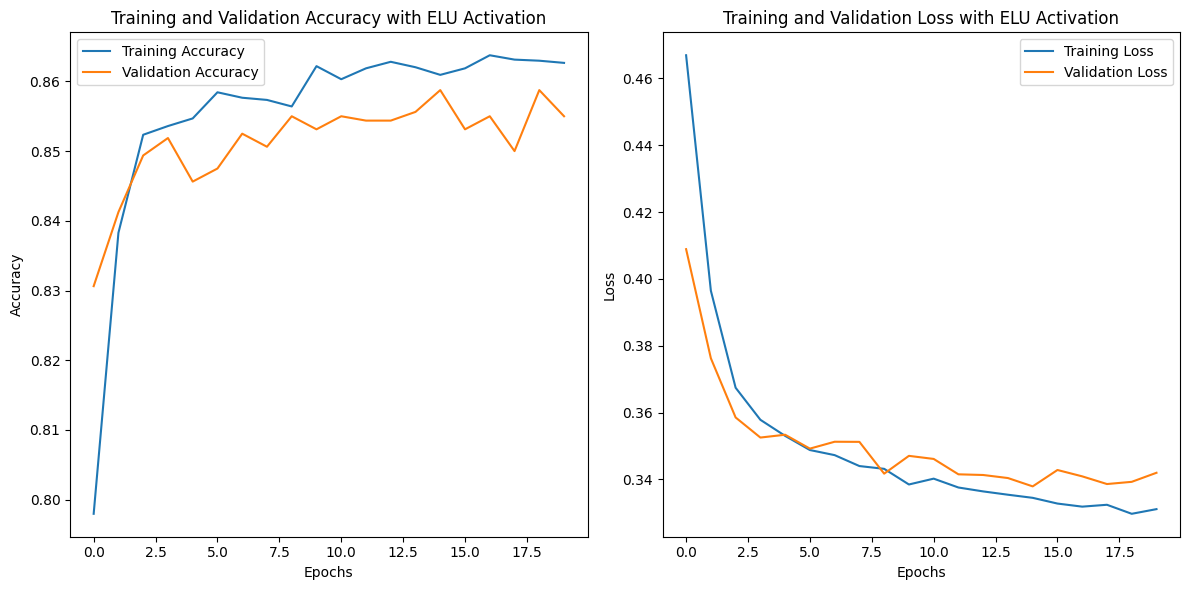

In [ ]:
# Accuracy plot
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history_elu.history['accuracy'], label='Training Accuracy')
plt.plot(history_elu.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy with ELU Activation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history_elu.history['loss'], label='Training Loss')
plt.plot(history_elu.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss with ELU Activation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()